# Project: Investigate a Dataset - [No-show appointments]

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
**‘ScheduledDay’** tells us on what day the patient set up their appointment.
**‘Neighborhood’** indicates the location of the hospital.
**‘Scholarship’** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
**‘No_Show’**: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
>1. Total Number of Patients who showed-up vs Patients who did'nt show-up

>2.  What factor is associated with patients' attendance ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), to make the patient make it to his appiontment?

Importing standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

colors = ['limegreen', 'blue']

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> Loading in the data to check for cleanliness, and then trim and clean the dataset for analysis. 


### General Properties

In [31]:
# Loading the csv file to check our data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Showing the first few lines of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> Cleaning the data to ensure that it is free from possible errors and bias which may have have wrongly inputed while collecting the data
 

In [4]:
# Getting information about our data - num of columns and rows and pissiblybmissing rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Summary of the entire data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Checking for duplicates in the data
df.duplicated().sum()

0

In [7]:
# Checking the dimension of the data
df.shape

(110527, 14)

Checking if the dataset contains empty values

In [8]:
# Checking if there are null values in our data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Dropping columns that are not neccessary for our analysis

In [9]:
# Dropping columns that are not neccessary for our analysis - PatentID, AppointmentID
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

Renaming the columns for easy recognistion and formating

In [10]:
# Let's ensure our column names are well spelt and arranged
# Renaming columns
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show': 'No_show'}, inplace=True)

In [11]:
# Confirming column rename
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


Converting into proper formats

In [12]:
# Converting into proper formats
# Here we are converting ScheduledDay and AppointmentDay to the proper Datetime formats
df['ScheduledDay'] = df['ScheduledDay'].apply(pd.to_datetime)
df['AppointmentDay'] = df['AppointmentDay'].apply(pd.to_datetime)

In [13]:
# Confirming the proper formats has reflected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Scholarship     110527 non-null  int64              
 5   Hypertension    110527 non-null  int64              
 6   Diabetes        110527 non-null  int64              
 7   Alcoholism      110527 non-null  int64              
 8   Handicap        110527 non-null  int64              
 9   SMS_received    110527 non-null  int64              
 10  No_show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(2)
memory usage: 9.3+ MB


using mean value of the age to ages less or equal to zero

In [14]:
# Noticed that there are patients whose ages are less or equal tozero.
# Let's say they are missing data and use mean value of the age to fill them.
# AgeMean = df['Age'].mean()

In [15]:
# Filling the ages with the mean of the new age
# df[df['Age'] <= 0] = AgeMean

In [16]:
# Since mean cannot be computed on non-numeric values, we convert the boolean values to numeric values
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

C:\Users\pc\AppData\Local\Temp\ipykernel_12736\3537391796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'Yes'] = '1'
C:\Users\pc\AppData\Local\Temp\ipykernel_12736\3537391796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'No'] = '0'


In [17]:
# Creating Mask for the number of persons who showed_up and who didn't show up
showed = df.No_show == 0 # patients who showed up
Not_show = df.No_show == 1 # patients who didn't show up

df['showed'] = showed
df['Not_show'] = Not_show

In [18]:
# Checking the dataset again
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,showed,Not_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,0,True,False
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,0,True,False
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,0,True,False
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,0,True,False
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,0,True,False


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Total Number of Patients who showed-up vs Patients who did'nt show-up)

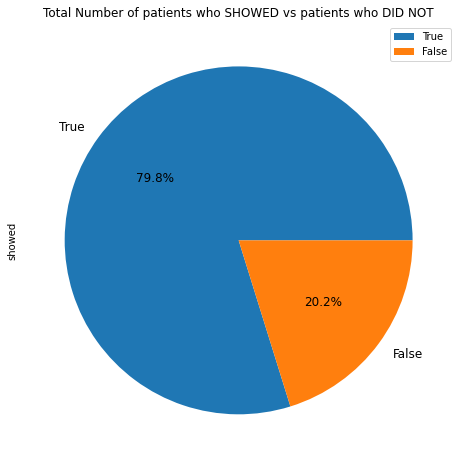

In [19]:
# Source: https://stackoverflow.com/questions/21090316/plotting-pandas-dataframes-in-to-pie-charts-using-matplotlib

# Using a Pie Chart to show the number of persons who show and those who did'nt show

plot = df['showed'].value_counts().plot.pie(fontsize = 12, autopct='%1.1f%%', figsize=(8,8))
plot.set_title('Total Number of patients who SHOWED vs patients who DID NOT')
plt.legend();

### Research Question 2  (What factor is associated with patients' attendance ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), to make the patient make it to his appiontment?!))

In [20]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,showed,Not_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,0,True,False
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,0,True,False
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,0,True,False
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,0,True,False
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,0,True,False


Getting the average age for those who showed and those who did not

In [21]:
df.Age[showed].mean()

37.790064393252315

In [22]:
df.Age[Not_show].mean()

34.31766656212196

### Showing the Frequency of the patients who showed for the appointment

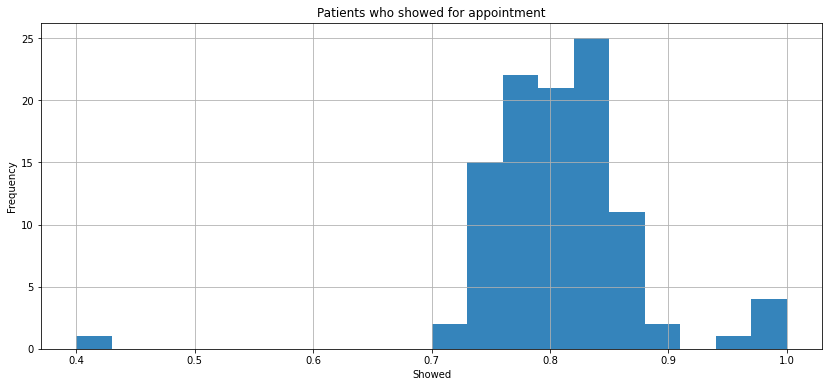

In [23]:
# Histogram showing the frequency distribution of age those who showed for the appointment
# the mean age for patients who showed up for the appointment
df.groupby('Age')['showed'].mean().hist(alpha=0.9, bins=20, label='Showed', figsize=(14,6))
plt.xlabel('Showed')
plt.ylabel('Frequency')
plt.title('Patients who showed for appointment')
plt.legend;

This shows that older people showed up for the appointment

### Showing Relationships between the independent variables and dependent variable(NO_SHOW)

In [24]:
# Ceate a function for the graph plotting
def graphing(df, x_var, y_var, color = colors):
#     This function ensures code repition is avoided when plotting the relationships
#     between those who showed and the factors that affected them
    df.groupby(x_var)[y_var].mean().plot(kind='bar', color=colors, alpha=.5, figsize=(14,6), edgecolor='black')
    plt.title('Relationship between who ' + y_var + ' and ' + x_var)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend();

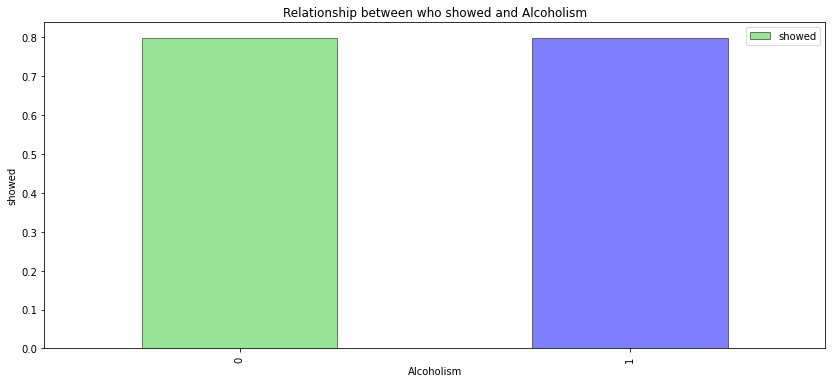

In [25]:
# Plotting the Relationship between Alcoholism and the patients who showed up
graphing(df, 'Alcoholism', 'showed')

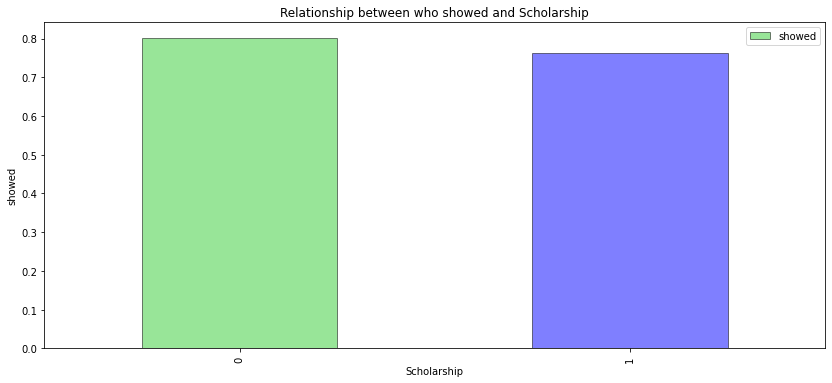

In [26]:
# Relationship between Alcoholism and the patients who showed up
graphing(df, 'Scholarship', 'showed')

The graph above shows few people didn't show for the appointment because they are on scholarship

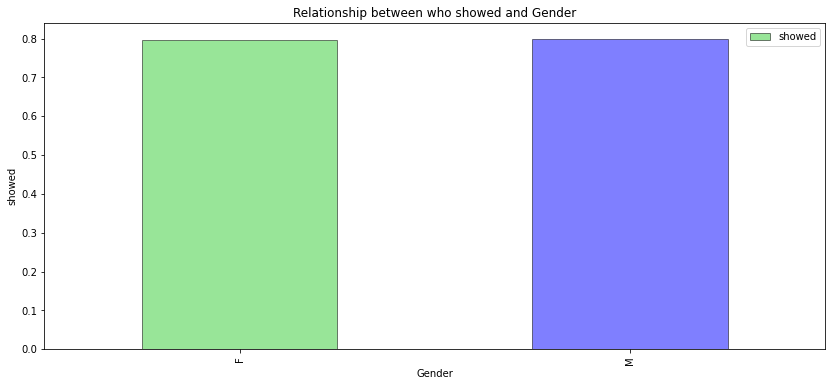

In [27]:
# Relationship between Scholarship and the patients who showed up
graphing(df, 'Gender', 'showed')

The graph above shows that gender didn't afect the appoinment

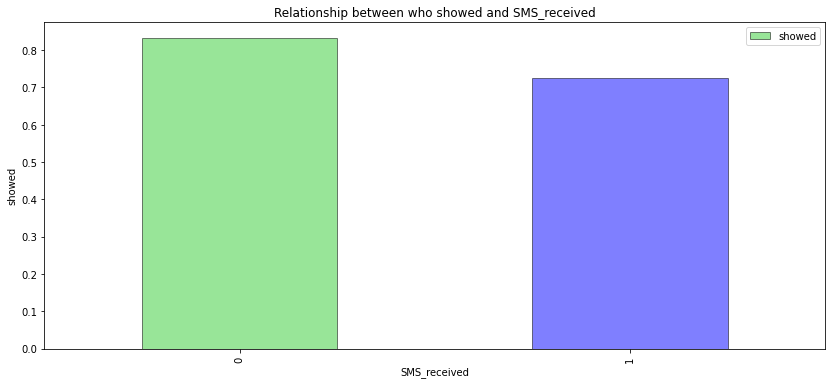

In [28]:
# Relationship between SMS_received and the patients who showed up
graphing(df, 'SMS_received', 'showed')

The graph shows that sending SMS does not really mean that the patients would show up for the appointment

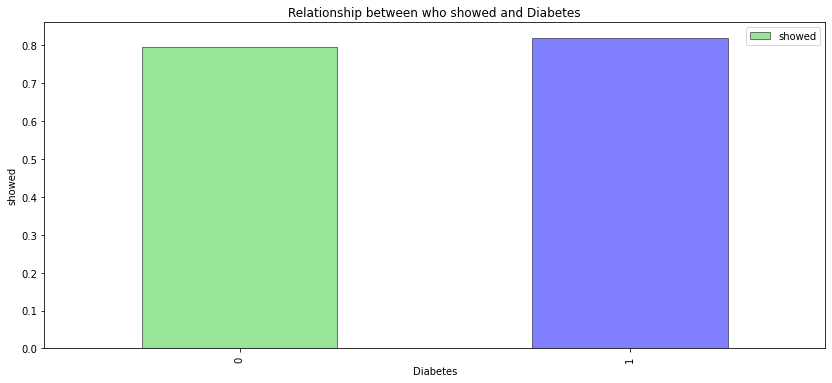

In [29]:
# Relationship between patients with Diabetes and the patients who showed up
graphing(df, 'Diabetes', 'showed')

This shows that those who had diabetes showed up more for the appointment.

<a id='conclusions'></a>
## Limitation
We ought to also consider the how patients' distance from work place or home to the hospital influence their attendance.

## Conclusions
From our analysis;
> - For the patients scheduled for Doctors appointment, those who showed up and those who didn't were **79.8%** and **20.2%** respectively. Meaning more patients showed for the appointment.
> - The patients who showed up for the appointment are almost the same as people who are **alcoholic**. Meaning Alcohol intake  has no influence on the attendance.
> - Gender and Alcoholism didn't influence the attendance. As such, not a factor to consider for the analysis.
> - Few people who are on **scholarship** didn't show up for the appointment. Meaning that most patients didn't show up because they are on scholarship.
> - Older patients showed up more for the doctor's appointment. With an average of 37.79 showing up and average of 34.31 not showing up for the appointment. Meaning **Age** is an important factor to consider from our analysis.
> - Patients with diabetes showed more. Meaning Diabetes is associated with age.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295